# Assigmnet_Fcm using Iris Dataset
---

##  Libraries

In [379]:
# ordinary 
import numpy as np 
import pandas as pd
import math
import operator
import random 
from matplotlib import pyplot as plt

# Other 
from sklearn.metrics import accuracy_score , precision_score , recall_score
from scipy.stats import multivariate_normal     # for generating pdf
from  IPython.display import Image
from fcmeans import FCM

##  Read Data

In [380]:
# read the data 
data = pd.read_csv('emails.csv')

# drop the Email No. Column  
data.drop('Email No.' , axis = 1 , inplace=True)

# get the columns 
columns = list(data.columns)

# get the features 
features = columns[:len(columns)-1]

# get the target ( Prediction column which is spam or not spam )
class_labels = list(data[columns[-1]])

data = data[features]
data.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [381]:
# Unique to and From
print('Total number of emails: %d' %len(data))
print('------------')
print('Number of unique received: %d '%data['to'].nunique())
print('------------')
print('Number of unique Sent: %d '%data['from'].nunique())

Total number of emails: 5172
------------
Number of unique received: 72 
------------
Number of unique Sent: 20 


# FCM Algorithm from Scratch 

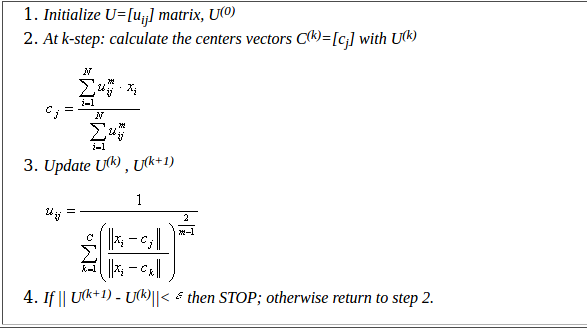

In [382]:
Image('fcm_algo.png')

##  Initialize MemberShip Matrix

In [383]:
def Initialize_Membership_Matrix(n , k):
    """
       inputs: 
           -> n: Number of data points 
           -> k: number of clusters 
           
       return:
            -> Membership_Matrix list initialized
    """
    # matrix as list 
    membership_matrix = []
    membership_matrix = np.random.randint(low=100, high=200, size=(n, k))
    membership_matrix = membership_matrix / membership_matrix.sum(axis=1, keepdims=True)

    return membership_matrix

## Compute the cluster centers 

In [384]:
def Compute_Centroids(membership_matrix , n , k , g):
    """
        inputs:
            -> membership_matrix: membership_matrix list
            -> n: Number of data points 
            -> k: number of clusters 
            -> g: fuzziness parameter 
        
       return:
            -> clusters centroids list
    """
    mem_values = list(zip(*membership_matrix)) # list of membership_values (u)
    cluster_centers = []                      # list for centers 
   
    
    
    # loop over the cluster numbers 
    for j in range(k):
        u = list(mem_values[j])         # get the U (membership values)
        u_power = [p ** g for p in u]     # get the U power g 
        denominator = sum(u_power)      # get the denominator
    
        temp_num = []
        # loop over data points
        for i in range(n):
            data_point = list(data.iloc[i])  # data point have 4 values -> 4 features
            prod = [u_power[i] * val for val in data_point] # u * x
            temp_num.append(prod)                           # append in list  ( u * x ) 
                
            
        numerator = map(sum , list(zip(*temp_num)))    # get the numerator
        center = [z/denominator for z in numerator]    # get the center
        cluster_centers.append(center)                 # append the center into list
        
    return cluster_centers

##  Update Membership Matrix

In [385]:
def Update_Membership_Matrix(membership_matrix , cluster_centers , n , k , g):
    """
        inputs:
            -> membership_matrix: membership_matrix list
            -> cluster_centers: clusters centroids list
            -> n: Number of data points 
            -> k: number of clusters 
            -> g: fuzziness parameter 
        
       return:
            -> updated membership_matrix list
    """
    
    p = float(2/(g-1))        # the power
    
    # loop over the data points
    for i in range(n):
        x = list(data.iloc[i])    # get the data points into list 
        # get the distance for each point and cluster center
        d = [np.linalg.norm(np.array(list(map(operator.sub , x , cluster_centers[j])))) for j in range(k)]
        
        
        for j in range(k):
            # get the denominator sum of distances
            denominator = sum([ math.pow(float(d[j] / d[c]) , p) for c in range(k)])
            membership_matrix[i][j] = float(1/denominator)
            
    membership_matrix = membership_matrix / membership_matrix.sum(axis=1, keepdims=True)
    return membership_matrix

##  get the clusters labels

In [386]:
def get_clusters(membership_matrix , n):
    """
        inputs:
            -> membership_matrix: membership_matrix List 
            -> n: number of data points
        return: 
            -> predicted labels list 
    """
    predicted_labels = []
    for i in range(n):
        max_val , idx = max((val , idx) for (idx , val) in enumerate(membership_matrix[i]))
    
        predicted_labels.append(idx)
    
    return predicted_labels

##  Fuzzy_Cmeans_Algorithm

In [387]:
def Fuzzy_C_Means(n, k, g, MAX_ITERATION, min_err):
    np.random.seed(0)
    curr = 0
    
    # initialize membership matrix 
    membership_matrix = Initialize_Membership_Matrix(n , k)
        
    while curr <= MAX_ITERATION:
        cluster_centers = Compute_Centroids(membership_matrix , n , k , g)
        membership_matrix = Update_Membership_Matrix(membership_matrix , cluster_centers , n , k , g)
        
        predicted_labels = get_clusters(membership_matrix , n)
        
        if curr > 0:
            if abs(np.amax(membership_matrix[curr] - membership_matrix[curr-1])) < min_err:
                break
        
        curr +=1 
        
    membership_matrix = membership_matrix / membership_matrix.sum(axis=1, keepdims=True)    
    return predicted_labels, cluster_centers , membership_matrix
    

In [421]:
# n -> the number of data points 
# k -> the number of clusters 
# g -> the fuzziness parameter 
# MAX_ITERATIONS -> the iteration number to update the membership_matrix

k = 2
MAX_ITERATION = 3
n = len(data)
g = 2 
min_err = 0.01

c_labels, cluster_centers, membership_matrix = Fuzzy_C_Means(n , k , g , MAX_ITERATION, min_err)

In [422]:
membership_matrix = pd.DataFrame(membership_matrix , columns=['Cluster_1' , 'Cluster_2'])
membership_matrix

,Cluster_1,Cluster_2
0,0.782319,0.217681
1,0.250338,0.749662
2,0.789930,0.210070
3,0.765100,0.234900
4,0.754531,0.245469
...,...,...
5167,0.881307,0.118693
5168,0.310948,0.689052
5169,0.808843,0.191157
5170,0.906635,0.093365


In [423]:
cluster_centers = pd.DataFrame(cluster_centers , index=['Cluster_1_Centers' , 'Cluster_2_centers'])
cluster_centers

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
Cluster_1_Centers,4.918810,4.643878,3.839529,2.214746,2.449563,1.925450,41.689049,1.908850,1.387480,7.799537,...,0.003004,0.003174,0.008361,0.007739,0.070033,0.002504,0.00436,0.002904,0.707640,0.006752
Cluster_2_centers,9.328258,8.602649,7.150786,4.400438,4.181963,3.689619,76.874164,3.388639,3.014054,14.892615,...,0.010170,0.007872,0.018789,0.014504,0.141710,0.006792,0.00967,0.006012,1.230929,0.007423


In [424]:
print(" Model accuracy is : {} ".format(round(accuracy_score(class_labels , c_labels) , 2)))

 Model accuracy is : 0.61 


# FCM Sklearn Algorithm 

In [425]:
fcm = FCM(n_clusters=2 , m=2 , max_iter=3)
fcm.fit(data.values)
predicted = fcm.predict(data.values)

In [426]:
print(" Model accuracy is : {} ".format(round(accuracy_score(class_labels , predicted) , 2)))

 Model accuracy is : 0.61 


In [437]:
data = pd.read_csv('emails.csv')
data.drop('Email No.' , axis=1 , inplace=True)

spam = data[data['Prediction'] == 1].iloc[:,0:3000]
not_spam = data[data['Prediction'] == 0].iloc[:,0:3000]

In [473]:
spam

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
5,4,5,1,4,2,3,45,1,0,16,...,0,0,0,0,0,0,0,0,0,0
7,0,2,2,3,1,2,21,6,0,2,...,0,0,0,0,0,0,0,0,1,0
16,3,1,2,2,0,1,17,0,0,1,...,0,0,0,0,0,0,0,0,1,0
17,36,21,6,14,7,17,194,25,5,59,...,0,0,0,0,0,0,0,0,3,0
25,12,53,2,14,18,14,287,0,2,86,...,0,0,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5162,2,3,1,2,1,2,32,0,0,7,...,0,0,0,0,0,0,0,0,0,0
5163,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5166,1,0,1,1,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
